In [7]:
# Math Assignment

In [8]:
import pandas as pd
df = pd.read_csv("diabetics.csv")


In [9]:
import numpy as np

col = ['a','b','s','outcome']
x = df.drop(col, axis=1)
y = df['outcome']

matrix = x.to_numpy()
Y = y.to_numpy()

In [10]:
# 1. Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(matrix)

column_means = np.mean(standardized_data, axis=0)
print(column_means)

std_devs = np.std(standardized_data, axis=0)
print(std_devs)

[-8.64257020e-17 -7.71658054e-17 -1.38898450e-16  1.38898450e-16
  7.71658054e-17 -8.64257020e-17 -5.55593799e-17  1.85197933e-17
 -4.93861154e-17 -3.08663221e-17 -4.93861154e-17 -1.23465289e-17
 -2.00631094e-17  7.71658054e-18 -1.00315547e-15 -4.08978768e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


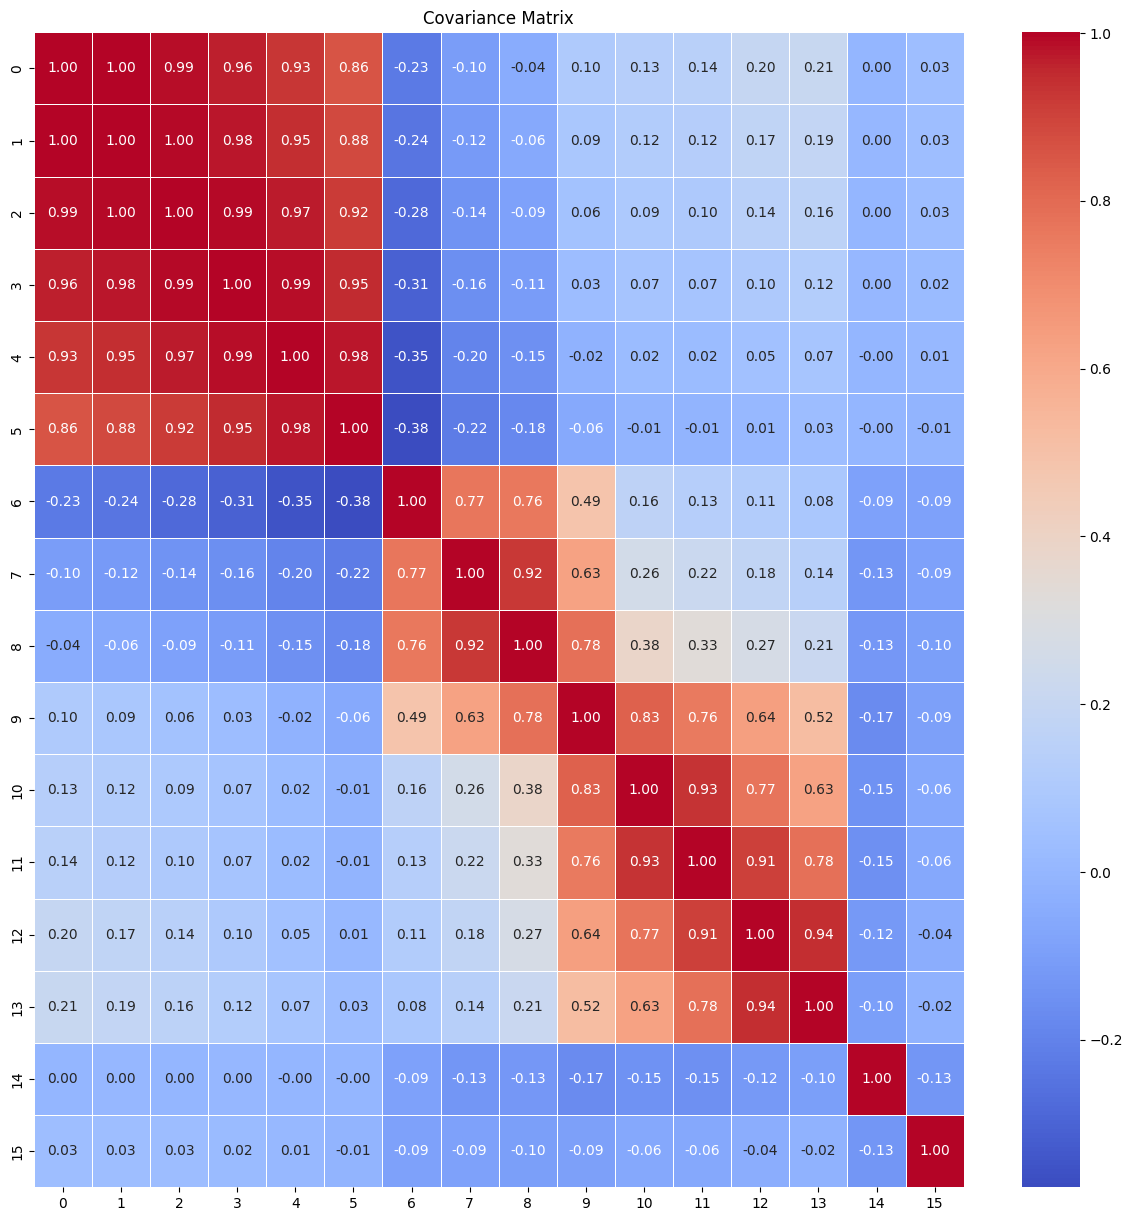

In [11]:
# 2. Covariance matrix

covariance_matrix = np.cov(standardized_data, rowvar=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

In [12]:
# 3. Diagonalization and Principal Components Selection

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

num_components = 2
eigenvalues_selected = eigenvalues_sorted[ :num_components]
eigenvectors_selected = eigenvectors_sorted[:, :num_components]
feature_vector = eigenvectors_selected

In [13]:
# 4. Reduced Dimensional Data
transformed_data = np.dot(standardized_data, eigenvectors_selected)

In [14]:
print(np.shape(matrix))
print(np.shape(transformed_data))

(1151, 16)
(1151, 2)


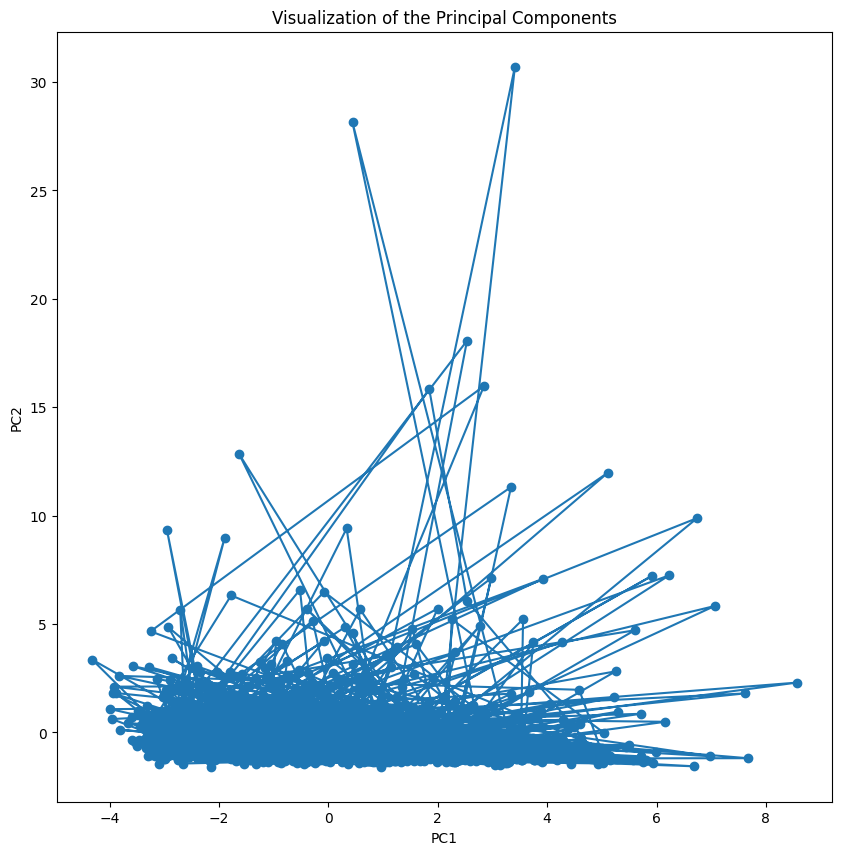

In [17]:
# Visualization of the Principal Components

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))  # Adjust figsize for a larger plot
ax = fig.add_subplot(111)
ax.plot(transformed_data[:, 0], transformed_data[:, 1],'o-')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Visualization of the Principal Components')
plt.show()

In [ ]:
# Visualization of the Principal Components

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))  # Adjust figsize for a larger plot
ax = fig.add_subplot(111)
ax.plot(transformed_data[:, 0], transformed_data[:, 1], 'o-')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Visualization of the Principal Components')
plt.show()

In [ ]:
# explained variance ratio

explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(explained_variance_ratio)) + 1, explained_variance_ratio, 'o-', markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()


In [ ]:
# Error Calculation

reconstructed_data = np.dot(transformed_data, eigenvectors_selected.T)
error = np.mean((standardized_data - reconstructed_data) ** 2)
print("Reconstruction Error: " , error)
